# Demo notebook for LatinCy model `la_core_web_sm`

Written by [Patrick J. Burns](https://diyclassics.github.io). Last updated July 2024.

In [1]:
# Imports 

import spacy
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from spacy import displacy
from pprint import pprint

In [2]:
# Set up spaCy NLP

model = 'la_core_web_sm'
nlp = spacy.load(model)
print(f'Loaded model: {model} v{nlp.meta["version"]}')

Loaded model: la_core_web_sm v3.7.7


In [3]:
pprint(nlp.pipe_names)

['senter',
 'normer',
 'tok2vec',
 'tagger',
 'morphologizer',
 'trainable_lemmatizer',
 'parser',
 'lookup_lemmatizer',
 'ner']


In [4]:
# Get sample text; first story from Ritchie's fables

text = """Haec narrantur a poetis de Perseo. Perseus filius erat Iovis, maximi deorum; avus eius Acrisius appellabatur. Acrisius volebat Perseum nepotem suum necare; nam propter oraculum puerum timebat. Comprehendit igitur Perseum adhuc infantem, et cum matre in arca lignea inclusit. Tum arcam ipsam in mare coniecit. Danae, Persei mater, magnopere territa est; tempestas enim magna mare turbabat. Perseus autem in sinu matris dormiebat."""

text =  text.replace("v","u").replace("V","U")

In [5]:
# Create spacy Doc object

doc = nlp(text)

In [6]:
# Helper function
def enumerate_print(l):
    for i, x in enumerate(l, 1):
        print(f"{i}: {x}")

In [7]:
# Get sentences from text

sents = doc.sents

enumerate_print(sents)

1: Haec narrantur a poetis de Perseo.
2: Perseus filius erat Iouis, maximi deorum;
3: auus eius Acrisius appellabatur.
4: Acrisius uolebat Perseum nepotem suum necare;
5: nam propter oraculum puerum timebat.
6: Comprehendit igitur Perseum adhuc infantem, et cum matre in arca lignea inclusit.
7: Tum arcam ipsam in mare coniecit.
8: Danae, Persei mater, magnopere territa est;
9: tempestas enim magna mare turbabat.
10: Perseus autem in sinu matris dormiebat.


In [8]:
# Get tokens from text

for token in doc:
    print(token)
    print(type(token))
    print([item for item in dir(token) if not item.startswith("_")])
    break

Haec
<class 'spacy.tokens.token.Token'>
['ancestors', 'check_flag', 'children', 'cluster', 'conjuncts', 'dep', 'dep_', 'doc', 'ent_id', 'ent_id_', 'ent_iob', 'ent_iob_', 'ent_kb_id', 'ent_kb_id_', 'ent_type', 'ent_type_', 'get_extension', 'has_dep', 'has_extension', 'has_head', 'has_morph', 'has_vector', 'head', 'i', 'idx', 'iob_strings', 'is_alpha', 'is_ancestor', 'is_ascii', 'is_bracket', 'is_currency', 'is_digit', 'is_left_punct', 'is_lower', 'is_oov', 'is_punct', 'is_quote', 'is_right_punct', 'is_sent_end', 'is_sent_start', 'is_space', 'is_stop', 'is_title', 'is_upper', 'lang', 'lang_', 'left_edge', 'lefts', 'lemma', 'lemma_', 'lex', 'lex_id', 'like_email', 'like_num', 'like_url', 'lower', 'lower_', 'morph', 'n_lefts', 'n_rights', 'nbor', 'norm', 'norm_', 'orth', 'orth_', 'pos', 'pos_', 'prefix', 'prefix_', 'prob', 'rank', 'remove_extension', 'right_edge', 'rights', 'sent', 'sent_start', 'sentiment', 'set_extension', 'set_morph', 'shape', 'shape_', 'similarity', 'subtree', 'suffix'

In [9]:
# Make dataframe with token attributes

data = []

for token in doc[:25]:
    data.append(
        [
            token.text,
            token.norm_,
            token.lower_,
            token.lemma_,
            token.pos_,
            token.tag_,
            token.dep_,
            token.has_vector,
            token.morph,
            token.ent_type_,
            token.text in nlp.vocab,
            token.is_oov,
        ]
    )

df = pd.DataFrame(
    data,
    columns=[
        "text",
        "norm",
        "lower",
        "lemma",
        "pos",
        "tag",
        "dep",
        "has_vector",
        "morph",
        "ent_type",
        "in_vocab",
        "is_oov",
    ],
)

df

,text,norm,lower,lemma,pos,tag,dep,has_vector,morph,ent_type,in_vocab,is_oov
0,Haec,haec,haec,hic,DET,pronoun,nsubj:pass,True,"(Case=Nom, Gender=Neut, Number=Plur)",,True,True
1,narrantur,narrantur,narrantur,narro,VERB,verb,ROOT,True,"(Mood=Sub, Number=Plur, Person=3, Tense=Pres, ...",,True,True
2,a,a,a,ab,ADP,preposition,case,True,(),,True,True
3,poetis,poetis,poetis,poeta,ADJ,noun,obl,True,"(Case=Abl, Gender=Masc, Number=Plur)",,True,True
4,de,de,de,de,ADP,preposition,case,True,(),,True,True
5,Perseo,perseo,perseo,Perseo,PROPN,proper_noun,nmod,True,"(Case=Abl, Gender=Fem, Number=Sing)",,True,True
6,.,.,.,.,PUNCT,punc,punct,True,(),,True,True
7,Perseus,perseus,perseus,Perseus,NOUN,noun,amod,True,"(Case=Nom, Gender=Masc, Number=Sing)",,True,True
8,filius,filius,filius,filius,NOUN,noun,ROOT,True,"(Case=Nom, Gender=Masc, Number=Sing)",,True,True
9,erat,erat,erat,sum,AUX,verb,cop,True,"(Mood=Ind, Number=Sing, Person=3, Tense=Imp, V...",,True,True


In [10]:
# Show dependency parse for sample sentence

text = """Tum arcam ipsam in mare coniecit."""
text =  text.replace("v","u").replace("V","U")

sents = nlp(text).sents

for sent in sents:
    print(f'spaCy dependecy parse for "{sent}"')
    displacy.render(sent, style="dep", jupyter=True)
    break

spaCy dependecy parse for "Tum arcam ipsam in mare coniecit."


In [11]:
# Noun chunks

selection = doc

selection.spans['NP'] = []
for chunk in selection.noun_chunks:
    if len(chunk) > 1:
        selection.spans['NP'].append(chunk)

colors = {'NP': '#85C1E9'}
options = {'spans_key': 'NP', 'colors': colors}
displacy.render(selection, style="span", jupyter=True, options=options)

In [12]:
# Named entities

text = """Iason et Medea e Thessalia expulsi ad urbem Corinthum venerunt, cuius urbis Creon quidam regnum tum obtinebat."""
text =  text.replace("v","u").replace("V","U")

doc = nlp(text)

print(f'spaCy displayed entities for "{sent}"')
displacy.render(doc, style="ent", jupyter=True)

spaCy displayed entities for "Tum arcam ipsam in mare coniecit."


In [13]:
# Plot proper_noun vectors with TSNE based on Ritchie's fables

with open('ritchies.txt', 'r') as f:
    contents = f.readlines()
    text = " ".join([line.strip() for line in contents if line.strip() and not line.startswith('#')])
    doc = nlp(text)

In [14]:
# Clearer with fewer elements; so only proper_nouns; extract vectors for text

vector_dict = {}

for item in doc:
    if item.tag_ == "proper_noun":
        vector_dict[item.norm_] = item.vector
        
words = list(vector_dict.keys())
vecs = list(vector_dict.values())

In [15]:
# Reduce vectors to 2D with TSNE; make dataframe

tsne = TSNE(n_components=2, perplexity=3, random_state=42)
reduced_vecs = tsne.fit_transform(np.asarray(vecs))
df = pd.DataFrame(reduced_vecs, index=words, columns=['x', 'y'])
df['word'] = df.index

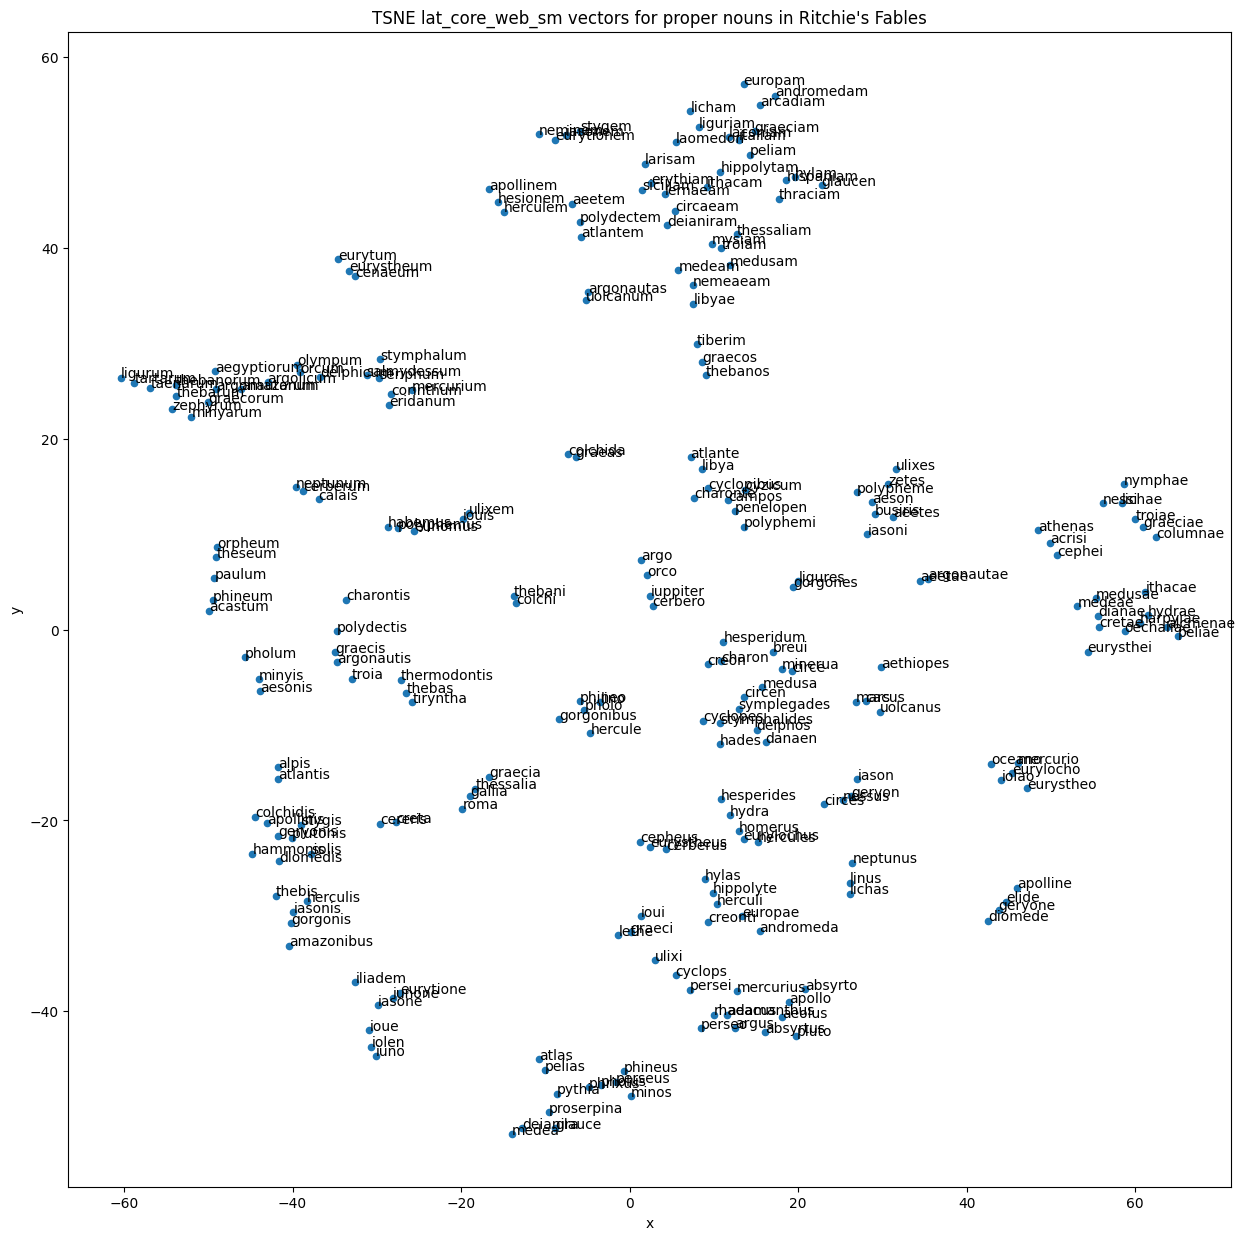

In [16]:
# Plot TSNE

ax = df.plot(kind='scatter', x='x', y='y', figsize=(15, 15), title="TSNE lat_core_web_sm vectors for proper nouns in Ritchie's Fables")

for idx, row in df.iterrows():
    ax.annotate(row['word'], (row['x'], row['y']))